In [1]:
# Dependencies
import pandas as pd
import calendar
from datetime import date
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Setup
plt.style.use('fivethirtyeight')
today = date.today()
today = pd.to_datetime(today)
data = pd.read_csv('dummy_data.csv', parse_dates=True,header='infer')
days_of_month = calendar.monthrange(today.year, today.month)
days_remain = (days_of_month[1]) - (today.day - 1)

def d_budget(sum_t):
    daily_budget = (sum_t / days_remain)
    return daily_budget



In [3]:

# Front end
print("DAILY BUDGET CALCULATOR")
print("--------------------------")
#print(f'Last run: {mem_dict[-1]}')
print(" ")
print("Today's date:", today)
print("--------------------------")
data.tail()

DAILY BUDGET CALCULATOR
--------------------------
 
Today's date: 2020-05-19 00:00:00
--------------------------


,date,balance,day_balance
11,2020-05-01,2676.31,86.332581
12,2020-05-02,2455.75,81.858333
13,2020-05-04,2268.00,81.000000
14,2020-05-05,1771.19,65.599630
15,2020-05-18,939.82,67.130000


In [4]:
# User input
total_sum = float(input('How much money do you currently have to budget through the end of the month?: '))
daily_budget = d_budget(total_sum)


How much money do you currently have to budget through the end of the month?:  758.54


In [5]:
# dataframe update
update_row = pd.DataFrame(data=[{'date':today, 'balance':total_sum, 'day_balance':daily_budget}])
data = data.append(update_row, ignore_index=True)
data['date'] = pd.to_datetime(data['date'])
data

,date,balance,day_balance
0,2020-04-24,381.53,54.504286
1,2020-04-25,381.53,63.588333
2,2020-04-25,359.03,59.838333
3,2020-04-25,259.03,43.171667
4,2020-04-25,259.03,43.171667
5,2020-04-26,457.03,91.406000
6,2020-04-27,149.94,37.485000
7,2020-04-28,117.53,39.176667
8,2020-04-28,104.58,34.860000
9,2020-04-29,524.58,262.290000


In [6]:
# Accumulators
print("--------------------------")
print(f'Assuming you spend no money, here is how your daily budget will accumulate through the end of the month')

total = 0
day = 0
x_day = []
y_total = []
for sol in range(days_remain):
    total = total + daily_budget
    print(f'DAY + {day} AMOUNT: {round(total, 2)}')
    x_day.append(day)
    y_total.append(total)
    day += 1

--------------------------
Assuming you spend no money, here is how your daily budget will accumulate through the end of the month
DAY + 0 AMOUNT: 58.35
DAY + 1 AMOUNT: 116.7
DAY + 2 AMOUNT: 175.05
DAY + 3 AMOUNT: 233.4
DAY + 4 AMOUNT: 291.75
DAY + 5 AMOUNT: 350.1
DAY + 6 AMOUNT: 408.44
DAY + 7 AMOUNT: 466.79
DAY + 8 AMOUNT: 525.14
DAY + 9 AMOUNT: 583.49
DAY + 10 AMOUNT: 641.84
DAY + 11 AMOUNT: 700.19
DAY + 12 AMOUNT: 758.54


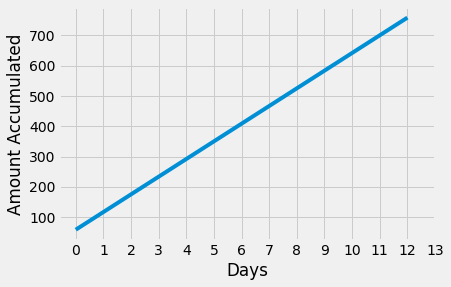

In [7]:
# Accumulator plot
plt.plot(x_day, y_total)
plt.xticks(np.arange(0, days_remain + 1, 1))
plt.xlabel('Days')
plt.ylabel('Amount Accumulated')
plt.show()


C:\Users\fitzp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


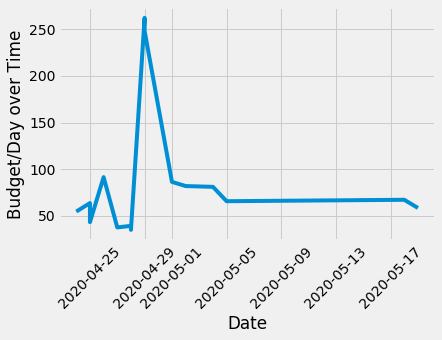

In [8]:

# budget per day over time plot

plt.plot(data['date'], data['day_balance'])
plt.xlabel('Date')
plt.ylabel('Budget/Day over Time')
plt.xticks(rotation=45)

plt.show()


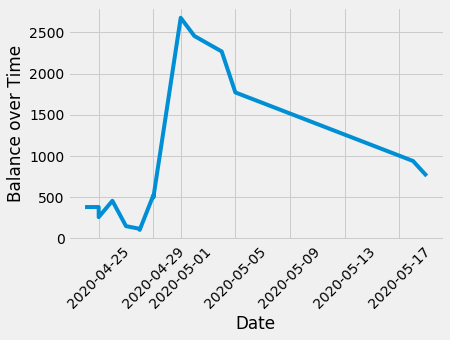

In [9]:
# balance over time plot
plt.plot(data['date'], data['balance'])
plt.xlabel('Date')
plt.ylabel('Balance over Time')
plt.xticks(rotation=45)

plt.show()

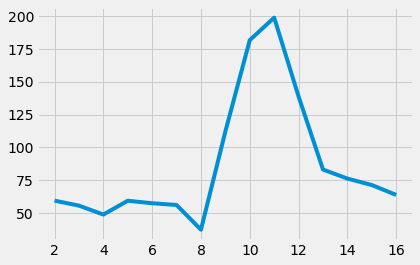

In [10]:
# Average daily budget over time
plt.plot(data['day_balance'].rolling(3).mean())

In [11]:
# export to excel
data.to_csv('dummy_data.csv', header=True, index=False)